# Imports

In [1]:
import os
import sys

import torch
import yaml

sys.path.append(os.path.abspath(os.path.join('..')))

import local_datasets

import init_training

from codecarbon import EmissionsTracker

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import time
from IPython.display import clear_output

# Carbon test

## Cfg

In [2]:
# change working directory if not /home/mappel/Dynaphos/viseon
if os.getcwd().split("/")[-1] != "viseon":
    os.chdir("/home/mappel/Dynaphos/viseon")

In [3]:
# def load_config(yaml_file):
#     with open(yaml_file) as file:
#         raw_content = yaml.load(file,Loader=yaml.FullLoader) # nested dictionary
#     return {k:v for params in raw_content.values() for k,v in params.items()} # unpacked

# experiment_yaml = ['./_config/exp1-snellius/128x128_contrained_boundary.yaml',
#                    './_config/exp1-snellius/lin64x64_contrained_boundary.yaml',
#                    './_config/exp1-snellius/fov64x64_contrained_boundary.yaml']

# # load configs into dict
# config = [load_config(yaml_file) for yaml_file in experiment_yaml]
# config = {key: value for key, value in zip(['128x128', '64x64lin', '64x64fov'], config)}

## Experiments

In [4]:
# experiments = ['128x128', '64x64lin', '64x64fov']
# num_data_points = 50

# model_outputs = {}

# # save model_output for all 3 for one batch 

# for experiment in experiments:
#     cfg = config[experiment]
#     testset = local_datasets.get_lapa_dataset(cfg, split='test')
#     models = init_training.get_models(cfg)

#     models['encoder'].load_state_dict(torch.load(cfg['save_path'] + 'checkpoints/final_encoder.pth'))
#     models['decoder'].load_state_dict(torch.load(cfg['save_path'] + 'checkpoints/final_decoder.pth'))

#     models['encoder'].eval()
#     models['decoder'].eval()

#     # to cuda
#     models['encoder'].to('cuda')
#     models['decoder'].to('cuda')

#     # The forward function
#     training_pipeline = init_training.get_training_pipeline(cfg)

#     # Forward pass of the encoder
#     i = 0
#     with torch.no_grad():
#         for batch in testset:
#             example_image = batch['image'].unsqueeze(0)
#             with EmissionsTracker(experiment) as tracker:
#                 _ = models['encoder'](example_image)

#             i += 1
#             if i > num_data_points:
#                 break

# Read

project_name
128x128     1.368649e-07
fov64x64    1.385835e-07
lin64x64    1.377617e-07
Name: emissions, dtype: float64
project_name
128x128     1.798126e-07
fov64x64    1.647124e-07
lin64x64    1.688952e-07
Name: emissions, dtype: float64
project_name
128x128     0.009914
fov64x64    0.010167
lin64x64    0.009938
Name: duration, dtype: float64
project_name
128x128     1200
fov64x64    1200
lin64x64    1200
Name: emissions, dtype: int64


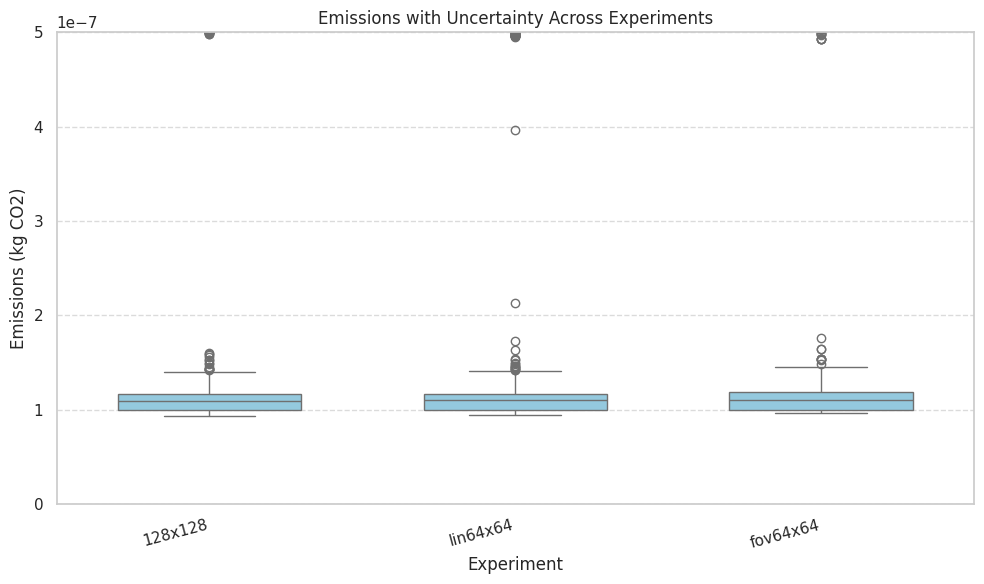

In [3]:

for i in range(1000):
    # Clear the previous output in the notebook
    clear_output(wait=True)

    # Read the results from CSV files
    emissions128x128 = pd.read_csv('emissions128x128_contrained_boundary.csv')
    emissions64x64lin = pd.read_csv('emissionslin64x64_contrained_boundary.csv')
    emissions64x64fov = pd.read_csv('emissionsfov64x64_contrained_boundary.csv')
    # Combine the data
    n_datapoints = 1200

    emissions = pd.concat([emissions128x128[:n_datapoints], emissions64x64lin[:n_datapoints], emissions64x64fov[:n_datapoints]])

    # change project names to 128x128, 64x64lin, 64x64fov
    emissions['project_name'] = emissions['project_name'].apply(lambda x: x.split('_')[0])

    # Average emissions and duration for each experiment
    print(emissions.groupby('project_name')['emissions'].mean())
    print(emissions.groupby('project_name')['emissions'].std())
    print(emissions.groupby('project_name')['duration'].mean())
    # amount of datapoints
    print(emissions.groupby('project_name')['emissions'].count())

    # Setting up the theme
    sns.set_theme(style="whitegrid")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="project_name", y="emissions", data=emissions, color="skyblue", width=0.6)
    # sns.stripplot(x="project_name", y="emissions", data=emissions, color="darkblue", alpha=0.6, jitter=0.1)

    # Customizing plot for better clarity
    # plt.yscale('log')
    plt.ylim(0, 1e-6/2)  # Adjust y-axis to focus on main data range
    plt.title("Emissions with Uncertainty Across Experiments")
    plt.xlabel("Experiment")
    plt.ylabel("Emissions (kg CO2)")

    # Rotate x-axis labels and add grid
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

    # Delay between iterations
    # time.sleep(4)
    break


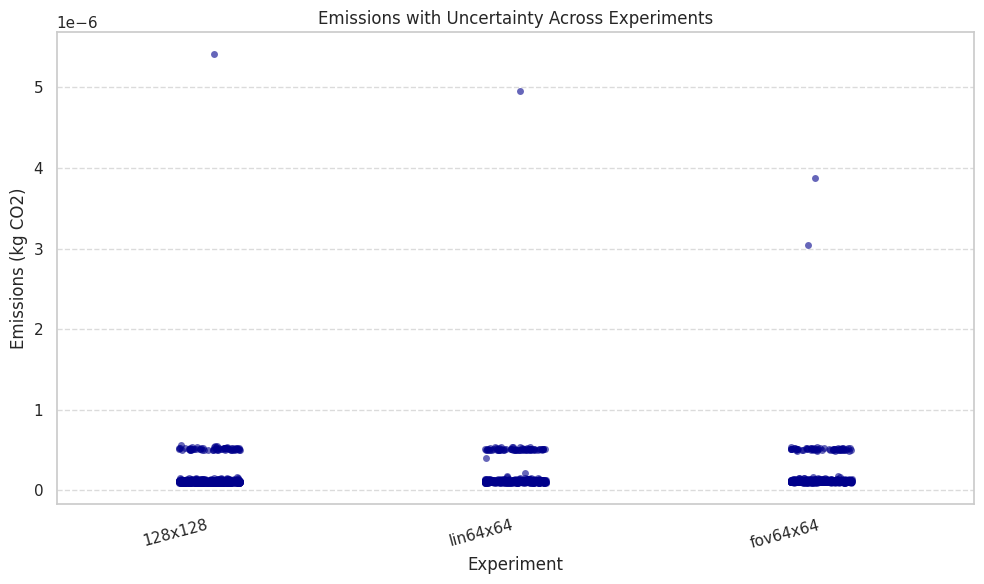

In [4]:
# Plot
plt.figure(figsize=(10, 6))
# sns.boxplot(x="project_name", y="emissions", data=emissions, color="skyblue", width=0.6)
sns.stripplot(x="project_name", y="emissions", data=emissions, color="darkblue", alpha=0.6, jitter=0.1)

# Customizing plot for better clarity
# plt.yscale('log')
# plt.ylim(0, 1e-6)  # Adjust y-axis to focus on main data range
plt.title("Emissions with Uncertainty Across Experiments")
plt.xlabel("Experiment")
plt.ylabel("Emissions (kg CO2)")

# Rotate x-axis labels and add grid
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [5]:
emissions.keys()

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'codecarbon_version', 'cpu_count', 'cpu_model',
       'gpu_count', 'gpu_model', 'longitude', 'latitude', 'ram_total_size',
       'tracking_mode', 'on_cloud', 'pue'],
      dtype='object')

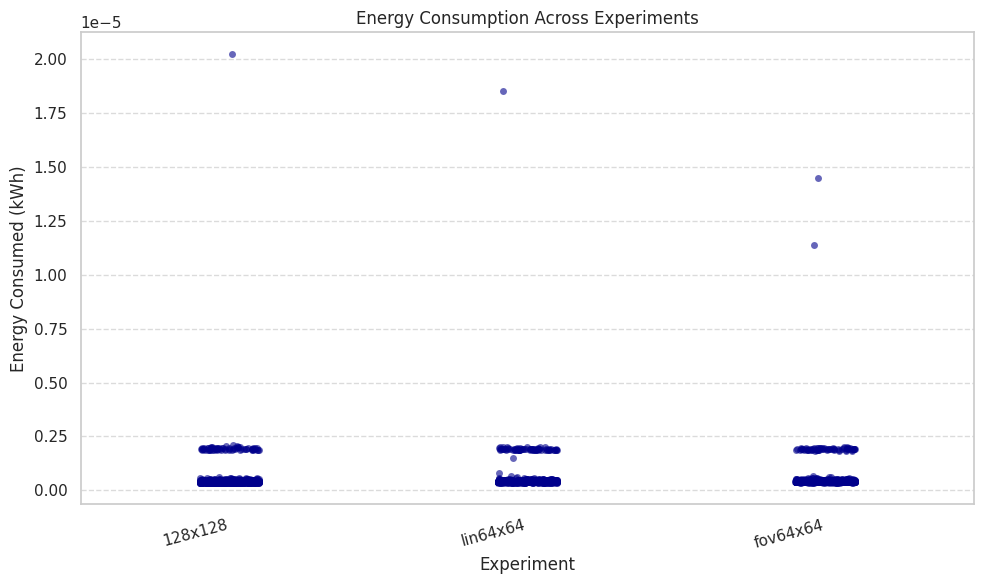

In [6]:
# Plot
plt.figure(figsize=(10, 6))
# sns.boxplot(x="project_name", y="energy_consumed", data=emissions, color="skyblue", width=0.6)
sns.stripplot(x="project_name", y="energy_consumed", data=emissions, color="darkblue", alpha=0.6, jitter=0.1)
# sns.stripplot(x="project_name", y="emissions", data=emissions, color="green", alpha=0.6, jitter=0.1)

# titles
plt.title("Energy Consumption Across Experiments")
plt.xlabel("Experiment")
plt.ylabel("Energy Consumed (kWh)")


# Rotate x-axis labels and add grid
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()